# Healthy Tree
## Set parameters

In [2]:
from gprMax.gprMax import api
from tools.outputfiles_merge import merge_files
from math import sqrt

In [30]:
%%writefile test/new.in
#python:
pos = [0.584, 0.566, 0.55 , 0.532, 0.516, 0.5  , 0.484, 0.468, 0.454,
       0.438, 0.424, 0.41 , 0.396, 0.384, 0.372, 0.36 , 0.35 , 0.34 ,
       0.332, 0.324, 0.316, 0.31 , 0.306, 0.302, 0.3  , 0.3  , 0.3  ,
       0.302, 0.306, 0.31 , 0.316, 0.324, 0.332, 0.34 , 0.35 , 0.36 ,
       0.372, 0.384, 0.396, 0.41 , 0.424, 0.438, 0.454, 0.468, 0.484,
       0.5  , 0.516, 0.532, 0.55 , 0.566, 0.584]
#Params
b_scan_cnt = 51
resolution = 0.002
time_window = 3e-8
pml_cells = 25

x_gap = 0.05
y_gap = 0.02
src_to_pml = 0.05

radius =  0.2
src_to_trunk_center = pos[current_model_run - 1]
src_to_rx = 0.1

# Derived Parameters
src_to_trunk = src_to_trunk_center-radius
    
diameter = radius* 2
pml = resolution * pml_cells
sharp_domain = [diameter, diameter + src_to_trunk]
domain = [sharp_domain[0] + pml * 2 + x_gap * 2, sharp_domain[1] +  pml * 2 + y_gap + src_to_pml]

trunk_center = [radius + pml + x_gap, src_to_trunk + radius + pml + src_to_pml]
src_position = [trunk_center[0] - (src_to_rx / 2), pml + src_to_pml, 0]
rx_position = [src_position[0] + src_to_rx, src_position[1], 0]

print('#title: Rotating Straight Scan')
print("#domain: {:.3f} {:.3f} 0.002".format(domain[0], domain[1]))
print("#dx_dy_dz: {} {} {}".format(resolution, resolution, resolution))
print("#time_window: {}".format(time_window))
print()
print('#pml_cells: {} {} 0 {} {} 0'.format(pml_cells, pml_cells, pml_cells, pml_cells))
print()
print("#geometry_objects_read: {:.3f} {:.3f} 0 h5/defect0_{}_200.h5 materials.txt".format((trunk_center[0]) - radius, (trunk_center[1]) - radius, current_model_run - 1))
print()
print('#waveform: ricker 1 1e9 my_ricker')
print("#hertzian_dipole: z {:.3f} {:.3f} {:.3f} my_ricker".format(src_position[0], src_position[1], src_position[2]))
print("#rx: {:.3f} {:.3f} {:.3f}".format(rx_position[0], rx_position[1], rx_position[2]))
if (current_model_run == (b_scan_cnt - 1)/2):
       print("#geometry_objects_write: 0 0 0 {:.3f} {:.3f} 0.002 new".format(domain[0], domain[1]))
# print("#geometry_objects_write: 0 0 0 {:.3f} {:.3f} 0.002 new{}".format(domain[0], domain[1], current_model_run - 1))
#end_python:

## Visualize the Healthy Trunk

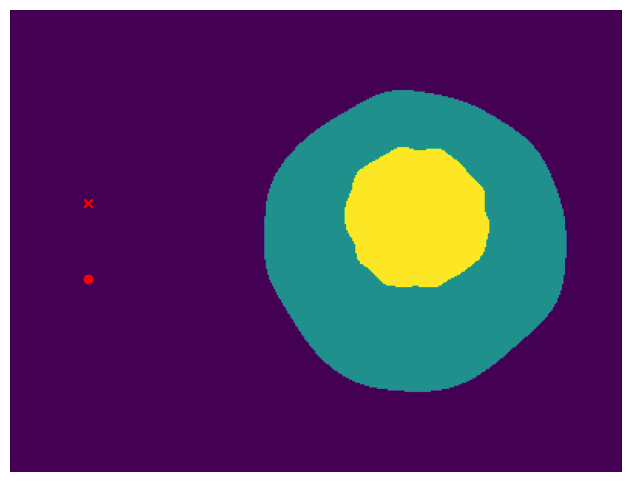

In [33]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from gprMax.gprMax import api
import os
import glob

folder_path = 'test/'
    
api('test/new.in', n=1, geometry_only=True, geometry_fixed=False)

# Delete material files
# Use glob to get a list of .txt files in the folder
txt_files = glob.glob(os.path.join(folder_path, '*.txt'))
# Iterate over the list of .txt files and delete them
for txt_file in txt_files:
    try:
        os.remove(txt_file)
    except Exception as e:
        print(f"Error deleting {txt_file}: {e}")

with h5py.File('test/new0.h5', 'r') as f2:
    dset = f2['data'][()]

# Set the desired width and height of the figure
fig_width = dset.shape[1] * 0.02
fig_height = dset.shape[0] * 0.02

# Create the figure and axes objects with the desired size and arrangement
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# Plot dset on the left subplot
## For 3D
# axs[0].imshow(np.transpose(dset[310,:,:], axes=(1, 0)), cmap='viridis')
ax.imshow(dset, cmap='viridis')
ax.invert_yaxis()
ax.set_title('Trace 0')

# Define your scatter data 
src = [0.25, 0.1]  
rx = [0.35, 0.1]  
# Format
src = [int(val / 0.002) for val in src]
rx = [int(val / 0.002) for val in rx]
# Plot scatter points on the same axis (axs[0])
ax.scatter(src[1], src[0], c='red', marker='o', label='Src Points')  # Adjust color, marker, and label as needed
ax.scatter(rx[1], rx[0], c='red', marker='x', label='Rx Points')  # Adjust color, marker, and label as needed

# Display the image
plt.axis('off')
plt.show()


In [ ]:
# import k3d
# import numpy as np
# # plt_volume = k3d.volume(CT_scan_3D)
# plt_volume = k3d.volume(dset)

# plot = k3d.plot()
# plot.grid_visible = False
# plot += plt_volume
# plot.display()

## Plot A-scan

In [4]:
%matplotlib inline
from gprMax.receivers import Rx
from tools.plot_Ascan import mpl_plot
# api(filename + '.in', n=1, geometry_only=False)
api('new.in', n=1, geometry_only=False)
api('old.in', n=1, geometry_only=False)
# outputs = Rx.defaultoutputs
# outputs = ['Ez']
# plt = mpl_plot('new.out', outputs, fft=False)


=== Electromagnetic modelling software based on the Finite-Difference Time-Domain (FDTD) method 

    www.gprmax.com   __  __
     __ _ _ __  _ __|  \/  | __ ___  __
    / _` | '_ \| '__| |\/| |/ _` \ \/ /
   | (_| | |_) | |  | |  | | (_| |>  <
    \__, | .__/|_|  |_|  |_|\__,_/_/\_\
    |___/|_|
                     v3.1.6 (Big Smoke)

 Copyright (C) 2015-2023: The University of Edinburgh
 Authors: Craig Warren and Antonis Giannopoulos

 gprMax is free software: you can redistribute it and/or modify it under the
  terms of the GNU General Public License as published by the Free Software
  Foundation, either version 3 of the License, or (at your option) any later
  version.
 gprMax is distributed in the hope that it will be useful, but WITHOUT ANY
  WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR
  A PARTICULAR PURPOSE.  See the GNU General Public License for more details.
 You should have received a copy of the GNU General Public License along with
  gpr

## B Scan of the healthy tree

In [3]:
api('test/new.in', n= 51, geometry_only=False, geometry_fixed=False)


=== Electromagnetic modelling software based on the Finite-Difference Time-Domain (FDTD) method 

    www.gprmax.com   __  __
     __ _ _ __  _ __|  \/  | __ ___  __
    / _` | '_ \| '__| |\/| |/ _` \ \/ /
   | (_| | |_) | |  | |  | | (_| |>  <
    \__, | .__/|_|  |_|  |_|\__,_/_/\_\
    |___/|_|
                     v3.1.6 (Big Smoke)

 Copyright (C) 2015-2023: The University of Edinburgh
 Authors: Craig Warren and Antonis Giannopoulos

 gprMax is free software: you can redistribute it and/or modify it under the
  terms of the GNU General Public License as published by the Free Software
  Foundation, either version 3 of the License, or (at your option) any later
  version.
 gprMax is distributed in the hope that it will be useful, but WITHOUT ANY
  WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR
  A PARTICULAR PURPOSE.  See the GNU General Public License for more details.
 You should have received a copy of the GNU General Public License along with
  gpr

In [4]:
from tools.outputfiles_merge import merge_files
merge_files('test/new',True)

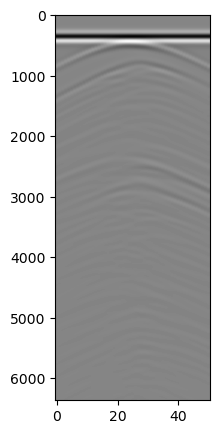

In [13]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
with h5py.File('test/new_merged.out', 'r') as f:
    bscan =  f['rxs']['rx1']['Ez'][()]
# Set the desired width and height of the figure
fig_width = 2
fig_height = 5

# Create the figure and axes objects with the desired size and aspect ratio
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# Generate the image
plt.imshow(bscan, cmap='gray', aspect='auto')
# Display the plot
plt.show()